# Data Processing
## Assignment 2
### Process Data Climate Change on Crop
### Step 1: Import Libraries Start by importing the necessary libraries:

   Temperature  Precipitation  CO2 Levels  Crop Yield  Soil Health  \
0            7             59         329         483           10   
1           39             20         426         679            8   
2           18             46         403         587            5   
3            9             91         356         220            5   
4           35             12         325         538            1   

  Extreme Weather Events Crop Disease Incidence Water Availability  \
0                Drought                    Low               High   
1               Heatwave                   High                Low   
2                  Flood                    Low             Medium   
3               Heatwave                 Medium             Medium   
4                  Storm                 Medium             Medium   

  Food Security Economic Impact  
0           Low            High  
1          High             Low  
2           Low          Medium  
3          High       

/var/folders/gv/rtnszm0j6zv_rcttl_93t75r0000gn/T/ipykernel_23981/3407011583.py:26: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


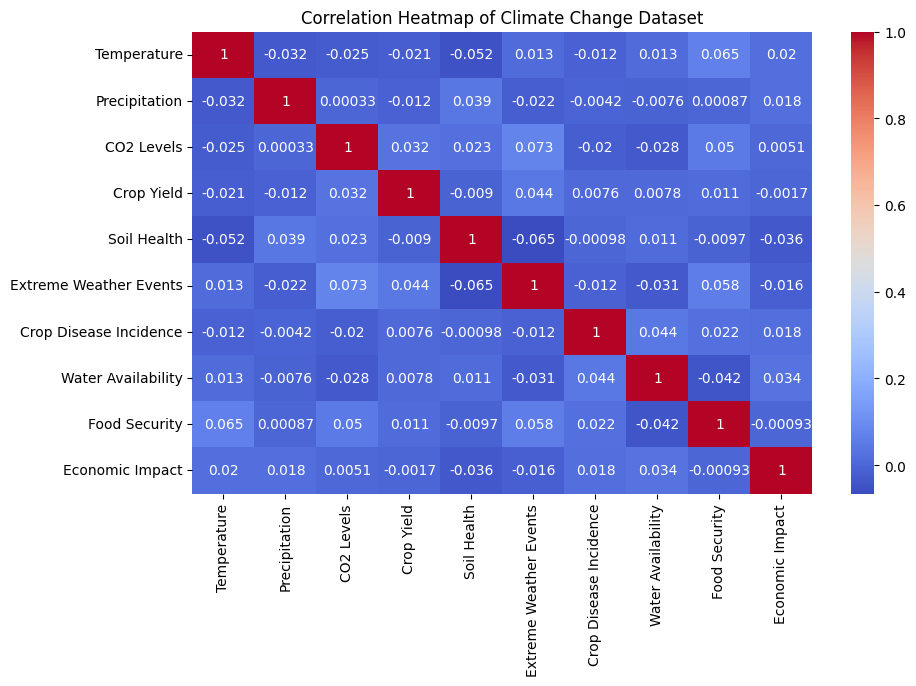

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Temperature             1000 non-null   float64
 1   Precipitation           1000 non-null   float64
 2   CO2 Levels              1000 non-null   float64
 3   Crop Yield              1000 non-null   float64
 4   Soil Health             1000 non-null   float64
 5   Extreme Weather Events  1000 non-null   int64  
 6   Crop Disease Incidence  1000 non-null   int64  
 7   Water Availability      1000 non-null   int64  
 8   Food Security           1000 non-null   int64  
 9   Economic Impact         1000 non-null   int64  
dtypes: float64(5), int64(5)
memory usage: 78.3 KB


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_squared_error

# Load the dataset
df = pd.read_csv('climate_change_agriculture_dataset.csv')

# Display the first few rows of the dataset
print(df.head())

# Step 3: Explore the Dataset
df.info()  # Summary of the dataset
df.describe()  # Statistical summary of the numerical columns
df.isnull().sum()  # Check for missing values

# Step 4: Handle Missing Values
# Fill missing numerical values with the mean
numeric_cols = df.select_dtypes(include=['number']).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

# Fill missing categorical values with the mode
for col in df.select_dtypes(include=['object']).columns:
    df[col].fillna(df[col].mode()[0], inplace=True)

# Step 5: Encode Categorical Variables
# Using LabelEncoder for encoding categorical columns
label_encoder = LabelEncoder()
categorical_cols = ['Extreme Weather Events', 'Soil Health', 'Crop Disease Incidence', 'Water Availability', 'Food Security', 'Economic Impact']
for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col])

# Step 6: Normalize Numerical Columns
numerical_columns = ['Temperature', 'Precipitation', 'CO2 Levels', 'Crop Yield', 'Soil Health']

# Initialize the scaler
scaler = StandardScaler()

# Apply the scaler to the numerical features
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

# Display the first few rows of the cleaned and transformed dataset
print(df.head())

# Visualizing the dataset (optional, good for understanding)
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Climate Change Dataset')
plt.show()

# Step 7: Final Dataset Overview
df.info()  # Summary of the final cleaned dataset
df.head()  # Display the first few rows of the cleaned dataset

# Save the cleaned and transformed dataset to a CSV file
df.to_csv('12processed_climate_change_data.csv', index=False)
